## Loading Libraries

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import trustworthiness

from gensim.models import KeyedVectors
import random
import time

In [2]:
# Connecting to drive for colab implementation
# from google.colab import drive

# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
binary_file_path = 'gdrive/MyDrive/GoogleNews-vectors-negative300.bin'

## Dimensionality Reduction on Swiss Roll dataset (100k points)

In [5]:
num_samples = 100000
data, t = make_swiss_roll(n_samples=num_samples,random_state=42)

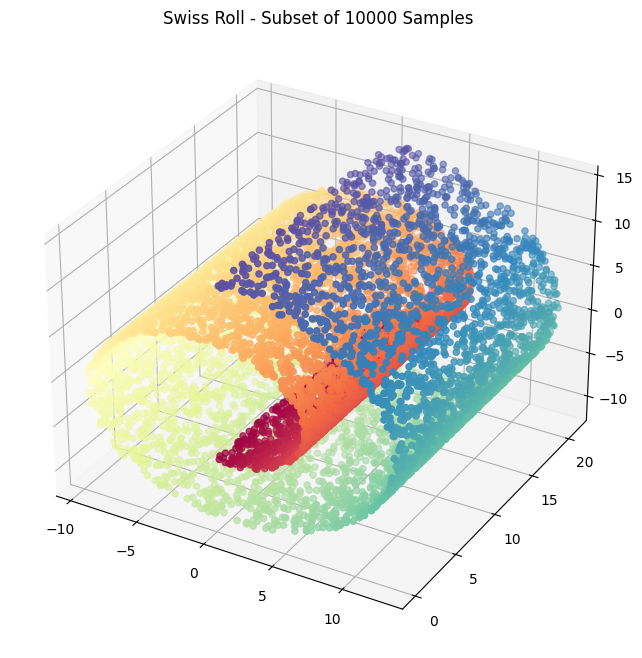

In [6]:
random_indices = np.random.choice(num_samples, size=10000, replace=False)
subset_data = data[random_indices]

# Plot the subset of samples
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset_data[:, 0], subset_data[:, 1], subset_data[:, 2], c=t[random_indices], cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll - Subset of 10000 Samples')
plt.show()

In [7]:
encoding_dim = 2 # Reduced number of dimensions
input_dim = data.shape[1]
input_data = tf.keras.Input(shape=(input_dim,))

# Use a normalization layer to normalize input data
normalized_input = layers.BatchNormalization()(input_data)
encoded = layers.Dense(128, activation='relu')(normalized_input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)  # Use 'linear' activation for encoding

# Use BatchNormalization to normalize the encoded representation
normalized_encoded = layers.BatchNormalization()(encoded)

decoded = layers.Dense(32, activation='relu')(normalized_encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)  # Use 'linear' activation for decoding

# Use BatchNormalization to normalize the decoded output
normalized_output = layers.BatchNormalization()(decoded)

autoencoder = tf.keras.Model(input_data, normalized_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                             

In [11]:
start_time = time.time()
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)
end_time = time.time()
print("Time taken for training: ", end_time-start_time)

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 45.4742
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 40.5083
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 35.9339
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 31.8408
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 28.1111
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 24.7691
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 21.7749
Epoch 8/50
391/391 [==============================] - 2s 6ms/step - loss: 19.0305
Epoch 9/50
391/391 [==============================] - 3s 7ms/step - loss: 16.6086
Epoch 10/50
391/391 [==============================] - 3s 7ms/step - loss: 14.4414
Epoch 11/50
391/391 [==============================] - 2s 6ms/step - loss: 12.5805
Epoch 12/50
391/391 [==============================] - 3s 7ms/step - loss: 10.9004
Epoch 13/50
3

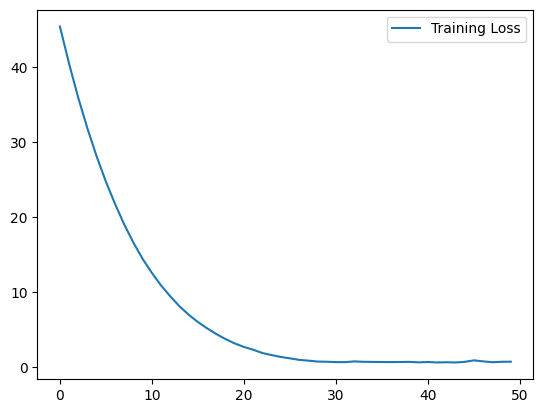

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [13]:
encencoder = tf.keras.Model(input_data, encoded)
lower_dimensional_embeddings = encencoder.predict(data)

3125/3125 [==============================] - 6s 2ms/step


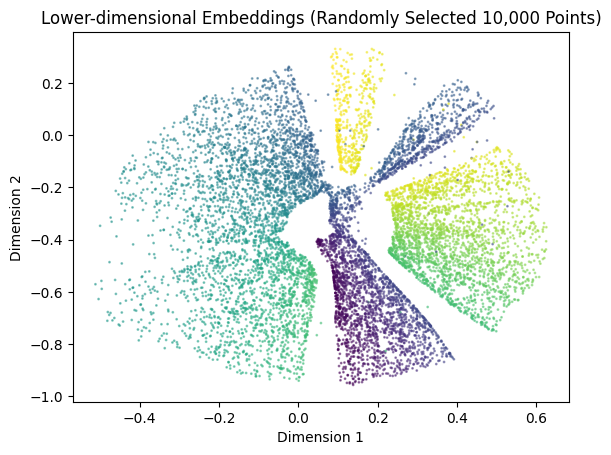

In [17]:
random_indices = np.random.choice(len(lower_dimensional_embeddings), size=10000, replace=False)
x_selected = lower_dimensional_embeddings[random_indices, 0]
y_selected = lower_dimensional_embeddings[random_indices, 1]

plt.scatter(x_selected, y_selected, alpha=0.5, s=1, c=t[random_indices])
plt.title('Lower-dimensional Embeddings (Randomly Selected 10,000 Points)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [18]:
batch_size = 10000
trustworthiness_scores = []

for i in range(0, len(data), batch_size):
    s_curve_batch = data[i:i+batch_size]
    target_mapping_batch = lower_dimensional_embeddings[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9987431565252202


## Dimensionality Reduction on Swiss Roll dataset 1 million points

In [19]:
num_samples = 1000000
data, t = make_swiss_roll(n_samples=num_samples,random_state=42)

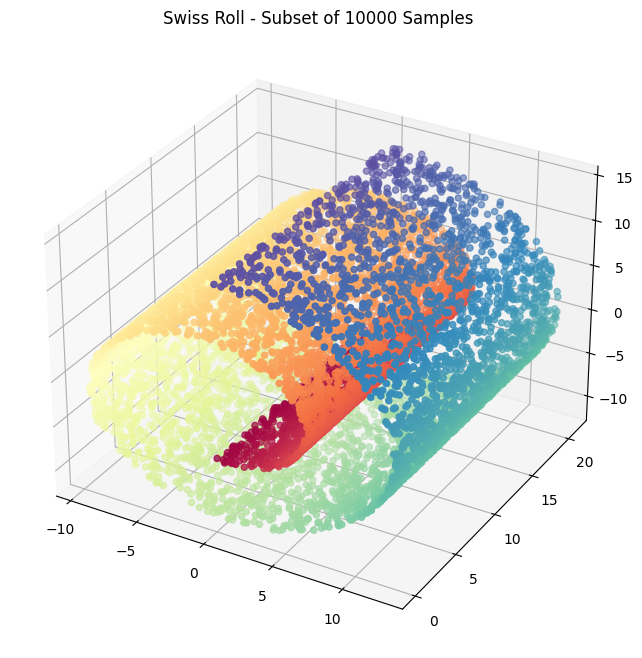

In [20]:
random_indices = np.random.choice(num_samples, size=10000, replace=False)
subset_data = data[random_indices]

# Plot the subset of samples
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset_data[:, 0], subset_data[:, 1], subset_data[:, 2], c=t[random_indices], cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll - Subset of 10000 Samples')
plt.show()

In [21]:
encoding_dim = 2 # Reduced number of dimensions
input_dim = data.shape[1]
input_data = tf.keras.Input(shape=(input_dim,))

# Use a normalization layer to normalize input data
normalized_input = layers.BatchNormalization()(input_data)
encoded = layers.Dense(128, activation='relu')(normalized_input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)  # Use 'linear' activation for encoding

# Use BatchNormalization to normalize the encoded representation
normalized_encoded = layers.BatchNormalization()(encoded)

decoded = layers.Dense(32, activation='relu')(normalized_encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)  # Use 'linear' activation for decoding

# Use BatchNormalization to normalize the decoded output
normalized_output = layers.BatchNormalization()(decoded)

autoencoder = tf.keras.Model(input_data, normalized_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 batch_normalization_3 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 128)               512       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                           

In [24]:
start_time = time.time()
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)
end_time = time.time()
print("Time taken for training: ", end_time-start_time)

Epoch 1/50
3907/3907 [==============================] - 30s 7ms/step - loss: 41.2701
Epoch 2/50
3907/3907 [==============================] - 25s 6ms/step - loss: 11.3779
Epoch 3/50
3907/3907 [==============================] - 26s 7ms/step - loss: 2.4618
Epoch 4/50
3907/3907 [==============================] - 26s 7ms/step - loss: 0.8097
Epoch 5/50
3907/3907 [==============================] - 24s 6ms/step - loss: 0.7847
Epoch 6/50
3907/3907 [==============================] - 24s 6ms/step - loss: 0.7739
Epoch 7/50
3907/3907 [==============================] - 23s 6ms/step - loss: 0.7081
Epoch 8/50
3907/3907 [==============================] - 26s 7ms/step - loss: 0.6871
Epoch 9/50
3907/3907 [==============================] - 25s 7ms/step - loss: 0.6807
Epoch 10/50
3907/3907 [==============================] - 24s 6ms/step - loss: 0.6245
Epoch 11/50
3907/3907 [==============================] - 24s 6ms/step - loss: 0.6179
Epoch 12/50
3907/3907 [==============================] - 25s 6ms/step - 

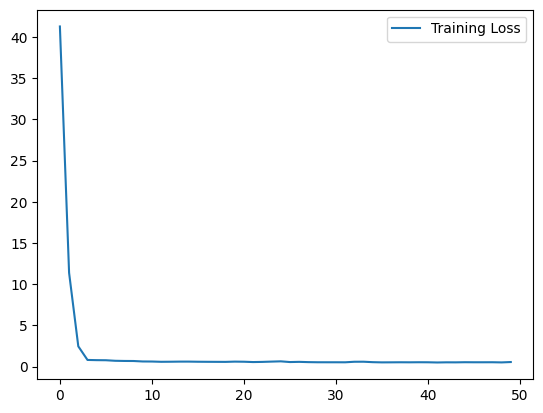

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [26]:
encencoder = tf.keras.Model(input_data, encoded)
lower_dimensional_embeddings = encencoder.predict(data)

31250/31250 [==============================] - 52s 2ms/step


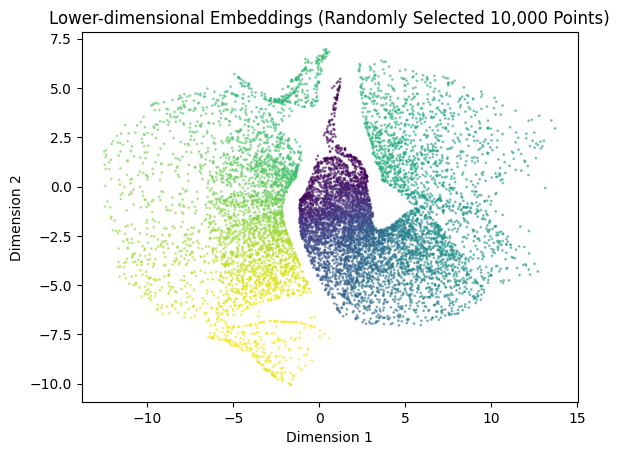

In [27]:
random_indices = np.random.choice(len(lower_dimensional_embeddings), size=10000, replace=False)
x_selected = lower_dimensional_embeddings[random_indices, 0]
y_selected = lower_dimensional_embeddings[random_indices, 1]

plt.scatter(x_selected, y_selected, alpha=0.5, s=1, c=t[random_indices])
plt.title('Lower-dimensional Embeddings (Randomly Selected 10,000 Points)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
batch_size = 10000
trustworthiness_scores = []

for i in range(0, len(data), batch_size):
    s_curve_batch = data[i:i+batch_size]
    target_mapping_batch = lower_dimensional_embeddings[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.99917497520016


## Dimensionality Reduction on Google news word embeddings

In [ ]:
binary_file_path = 'gdrive/MyDrive/GoogleNews-vectors-negative300.bin'
# Load the Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(binary_file_path, binary=True)
print("Number of rows: ", len(word2vec_model.index_to_key))
print("Dimensions of word vectors: ", word2vec_model.vector_size)

Number of rows:  3000000
Dimensions of word vectors:  300


In [ ]:
# Get a random subset of 100,000 words from the vocabulary
subset_words = random.sample(list(word2vec_model.key_to_index.keys()), 100000)

# Get the word vectors for the subset
subset_word_vectors = [word2vec_model[word] for word in subset_words]
subset_word_vectors = np.array(subset_word_vectors)

print(subset_word_vectors.shape)

(100000, 300)


In [ ]:
encoding_dim = 2 # Reduced number of dimensions
input_dim = subset_word_vectors.shape[1]
input_data = tf.keras.Input(shape=(input_dim,))

# Use a normalization layer to normalize input data
normalized_input = layers.BatchNormalization()(input_data)
encoded = layers.Dense(128, activation='relu')(normalized_input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)  # Use 'linear' activation for encoding

# Use BatchNormalization to normalize the encoded representation
normalized_encoded = layers.BatchNormalization()(encoded)

decoded = layers.Dense(32, activation='relu')(normalized_encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)  # Use 'linear' activation for decoding

# Use BatchNormalization to normalize the decoded output
normalized_output = layers.BatchNormalization()(decoded)

autoencoder = tf.keras.Model(input_data, normalized_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 batch_normalization_9 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 128)               38528     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 2)                 66        
                                                           

In [ ]:
history = autoencoder.fit(subset_word_vectors, subset_word_vectors, epochs=200, batch_size=256, shuffle=True)

Epoch 1/200
391/391 [==============================] - 5s 6ms/step - loss: 0.0240
Epoch 2/200
391/391 [==============================] - 3s 8ms/step - loss: 0.0158
Epoch 3/200
391/391 [==============================] - 3s 7ms/step - loss: 0.0157
Epoch 4/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0156
Epoch 5/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0155
Epoch 6/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0152
Epoch 7/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0151
Epoch 8/200
391/391 [==============================] - 3s 7ms/step - loss: 0.0150
Epoch 9/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0150
Epoch 10/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0149
Epoch 11/200
391/391 [==============================] - 2s 6ms/step - loss: 0.0149
Epoch 12/200
391/391 [==============================] - 3s 7ms/step - loss: 0.0148
Epoch 13/200


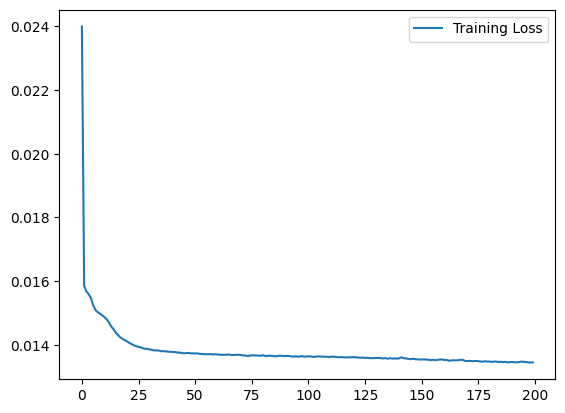

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [ ]:
encencoder = tf.keras.Model(input_data, encoded)
lower_dimensional_embeddings = encencoder.predict(subset_word_vectors)

3125/3125 [==============================] - 5s 2ms/step


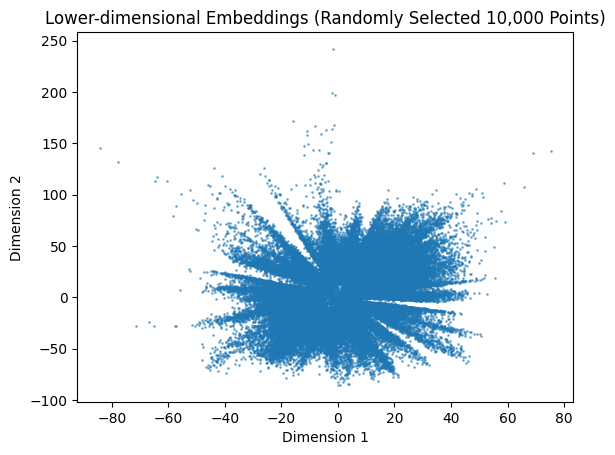

In [ ]:
random_indices = np.random.choice(len(lower_dimensional_embeddings), size=10000, replace=False)

# Extract the selected points
x_selected = lower_dimensional_embeddings[:, 0]
y_selected = lower_dimensional_embeddings[:, 1]

plt.scatter(x_selected, y_selected, alpha=0.5, s=1)  # Set a small marker size (adjust as needed)
plt.title('Lower-dimensional Embeddings (Randomly Selected 10,000 Points)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(subset_word_vectors), batch_size):
    s_curve_batch = subset_word_vectors[i:i+batch_size]
    target_mapping_batch = lower_dimensional_embeddings[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.6447794225380304
